In [70]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [71]:
# Download stock data for Visa Inc. (V)
ticker = 'V'
start_date = '2005-01-01'
end_date = '2023-04-03'
df = yf.download(ticker, start=start_date, end=end_date, interval="1mo")

# Copy of the original data
df_copy = df.copy()


[*********************100%***********************]  1 of 1 completed


In [72]:
# Save the data to a CSV file
filename = f'{ticker}_{start_date}_{end_date}.csv'
df.to_csv(filename)

In [73]:
df.drop("Volume", axis=1, inplace=True)
df["Price"] = df.mean(axis=1)
data = pd.Series(df["Price"]) 
data = data.dropna() 

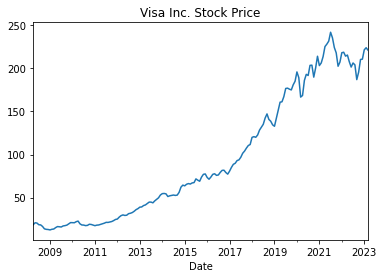

In [74]:
# Plot the data
data.plot(title='Visa Inc. Stock Price')

plt.show()